In [1]:
#from simplicial import SimplicialSystem

G = DiGraph(loops=True, multiedges=True)

G.add_edge(['132','132','2'])
G.add_edge(['132','132~','3'])
G.add_edge(['132~','123','2'])
G.add_edge(['132~','213','1'])

G.add_edge(['231','231','1'])
G.add_edge(['231','231~','3'])
G.add_edge(['231~','213','1'])
G.add_edge(['231~','123','2'])

G.add_edge(['123','123~','3'])
G.add_edge(['123','231','1'])
G.add_edge(['123~','123','2'])
G.add_edge(['123~','213','1'])

G.add_edge(['213','213~','3'])
G.add_edge(['213','132','2'])
G.add_edge(['213~','213','1'])
G.add_edge(['213~','123','2'])


In [1]:
def sub_complete(G, order, loser):
    alpha, beta, gamma = list(order)
    if loser == 'a':
        init = order + loser
        G.add_edge(init, init + '~', gamma)
        G.add_edge(init, beta+gamma+alpha+'b', alpha)
        G.add_edge(init + '~', init, beta)
        G.add_edge(init + '~', beta+alpha+gamma+'a', alpha)
    if loser == 'b':
        init = order + loser
        G.add_edge(init, init + '~', beta)
        G.add_edge(init, init, gamma)
        G.add_edge(init + '~', alpha+gamma+beta+'a', gamma)
        G.add_edge(init + '~', gamma+alpha+beta+'a', alpha)

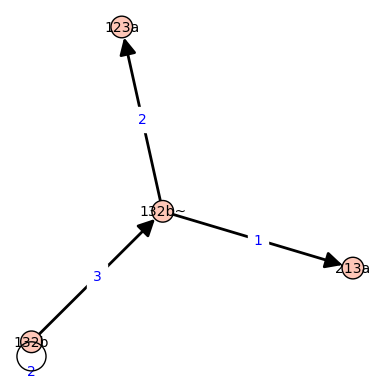

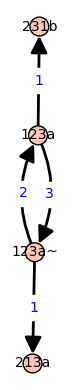

In [2]:
G = DiGraph(loops=True, multiedges=True)
sub_complete(G,'132','b')
G.show(edge_labels=True)

G = DiGraph(loops=True, multiedges=True)
sub_complete(G,'123','a')
G.show(edge_labels=True)

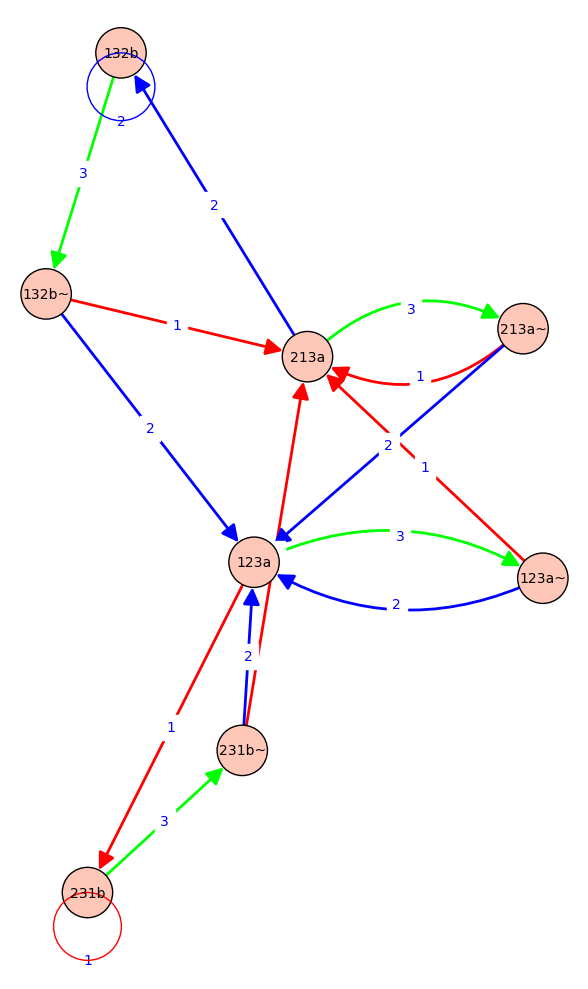

In [15]:
from simplicial import *

G = DiGraph(loops=True, multiedges=True)

for p in Permutations(3).list():
    for loser in ['a','b']:
        order = ''.join(str(x) for x in p)
        sub_complete(G,order,loser)
    
G0 = G.connected_components_subgraphs()[0]

SS = SimplicialSystem(G0)
SS.plot(figsize=[10,10])


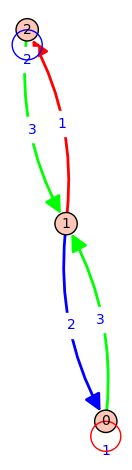

In [16]:
SS.dynamical_core().plot()

In [19]:
simplicial_systems.farey().plot()

NameError: name 'simplicial_system_dim2' is not defined

In [6]:
for v in G.vertex_iterator():
    print(G.edges_incident(v)[0][0])

123a
123a~
231b
213a
123b
123b~
132a
312a
132a~
321b
132b
132b~
213a~
213b
213b~
231a
321a
231a~
312b
231b~
312a~
312b~
321a~
321b~


In [7]:
q = {l:1. for l in set(G0.edge_labels())}
SS = SimplicialSystem(G0,q,'123a')

In [6]:
def T(s):
    M = identity_matrix(3)
    for n in range(3):
        i = int(s[n])
        for m in range(n,3):
            j = int(str(s[m]))
            M[i-1,j-1] = 1
    return(M)

def Ostro(v0, pos):
    SS.pos = pos

    v = {str(i+1):v0[i] for i in range(3)}
    while SS.pos[0] == pos[0]:
        v,_ = SS.path(1,v=v,inplace=True)
    return vector(v.values()), SS.pos

def proj(v, pos):
    w = T(pos)*vector(v)
    alpha = int(pos[0])
    beta, gamma = (int(pos[1]), int(pos[2])) if pos[-1] == 'a' else (int(pos[2]), int(pos[1]))
    return(w[beta-1]/w[alpha-1], w[gamma-1]/w[alpha-1])

def f(x):
    return x-floor(x)

def Ostro1(x):
    return f(1/x[0]), f(x[1]/x[0]) 

In [10]:
v = vector([random() for _ in range(3)])
pos = '123a'
x = proj(v,pos)

for _ in range(3):
    
    print(proj(v,pos), x)
    if (norm(vector(proj(v,pos))-vector(x)) > 1e-10):
        print(proj(v,pos), x)
    v, pos = Ostro(v, pos)
    x = Ostro1(x)    


(0.8130741501702043, 0.763663899167832) (0.8130741501702043, 0.763663899167832)
(0.22990012631771115, 0.9392303260507923) (0.22990012631771117, 0.9392303260507924)
(0.3497148784426814, 0.0853841235077021) (0.3497148784426809, 0.0853841235077013)


In [12]:
P = SS.plot_cotangent(100000,n_min=500,save='Ostro',frame=True, size=10)

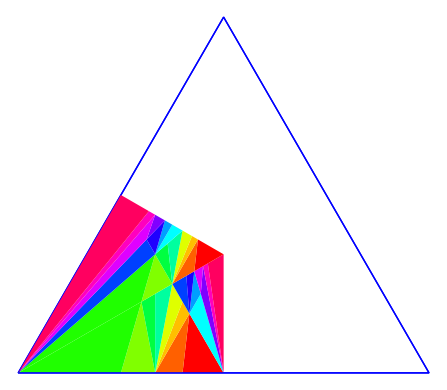

In [14]:
n = 4

SS.pos = '123a'
G1 = SS.decompose_simplex(n, leg=False, fill=True, T=T('123a'))

SS.pos = '132b'
G2 = SS.decompose_simplex(n, leg=False, fill=True, T=T('132b'))

G1+G2

In [10]:
def T(s):
    M = identity_matrix(3)
    for n in range(3):
        i = int(s[n])
        for m in range(n,3):
            j = int(str(s[m]))
            M[i-1,j-1] = 1
    return(M)

T('123')

[1 1 1]
[0 1 1]
[0 0 1]

In [12]:
v0 = vector([random() for _ in range(3)])
w = T('132')*v0
show(w)

SS.pos = '132'
v = {str(i+1):v0[i] for i in range(3)}
while not(SS.pos == '213' or SS.pos == '231'):
    v,_ = SS.path(1,v=v,inplace=True)
    print(v, _)
show(T(SS.pos)*vector([v[str(i+1)] for i in range(3)]))

(1.1144686405219688, 0.2500971044998055, 0.7461034787405649)

{'1': 0.3683651617814039, '2': 0.2500971044998055, '3': 0.24590926974095395} 2
{'1': 0.3683651617814039, '2': 0.0041878347588515386, '3': 0.24590926974095395} 3
{'1': 0.36417732702255234, '2': 0.0041878347588515386, '3': 0.24590926974095395} 2
{'1': 0.1182680572815984, '2': 0.0041878347588515386, '3': 0.24590926974095395} 3
{'1': 0.11408022252274685, '2': 0.0041878347588515386, '3': 0.24590926974095395} 2
{'1': 0.11408022252274685, '2': 0.0041878347588515386, '3': 0.1318290472182071} 1


(0.11408022252274685, 0.2500971044998055, 0.24590926974095395)

In [43]:
v = {str(i+1):v0[i] for i in range(3)}
SS.pos = '132'
vp, _ = SS.path(3,v,inplace=True)
print(SS.pos)
print(T(SS.pos))

123
[1 1 1]
[0 1 1]
[0 0 1]


In [42]:
v = {str(i+1):v0[i] for i in range(3)}
SS.pos = '132'
print(v)
for i in range(1,4):
    print(SS.path(i,v))
print(SS.pos)

{'1': 0.3683651617814039, '2': 0.2500971044998055, '3': 0.49600637424075944}
({'1': 0.3683651617814039, '2': 0.2500971044998055, '3': 0.24590926974095395}, '2')
({'1': 0.3683651617814039, '2': 0.0041878347588515386, '3': 0.24590926974095395}, '23')
({'1': 0.36417732702255234, '2': 0.0041878347588515386, '3': 0.24590926974095395}, '232')
132


In [32]:
print(T(SS.pos)*vector([vp[str(i+1)] for i in range(3)]))

(0.6142744315223578, 0.2500971044998055, 0.24590926974095395)


In [37]:
(w[0]-2*w[1], w[1], w[2]-2*w[1])

(0.6142744315223578, 0.2500971044998055, 0.24590926974095395)

In [89]:
show((w[0]-8*w[1], w[1], w[2]-3*w[1]))

(0.034618496313084446, 0.1849041965256365, 0.11660173608377378)

In [30]:
v0 = vector([random() for _ in range(3)])
w = T('123')*v0
show(w)

SS.pos = '123'
v = {str(i+1):v0[i] for i in range(3)}
while not(SS.pos == '213' or SS.pos == '231'):
    v,_ = SS.path(1,v=v,inplace=True)
    print(v)
show(T(SS.pos)*vector([v[str(i+1)] for i in range(3)]))

(1.196093618004589, 0.893915612265731, 0.011310794701901328)

{'1': 0.29086721103695645, '2': 0.8826048175638297, '3': 0.011310794701901328}
{'1': 0.29086721103695645, '2': 0.5917376065268732, '3': 0.011310794701901328}


(0.3021780057388578, 0.893915612265731, 0.011310794701901328)

In [77]:
v0 = vector([random() for _ in range(3)])
w = T('231')*v0
show(w)

SS.pos = '231'
v = {str(i+1):v0[i] for i in range(3)}
while not(SS.pos == '123' or SS.pos == '132'):
    v,_ = SS.path(1,v=v,inplace=True)
    print(v)
show(T(SS.pos)*vector([v[str(i+1)] for i in range(3)]))

(0.5508689146872764, 1.1824227570269894, 0.6105118182286849)

{'1': 0.49122601114586784, '2': 0.5719109387983043, '3': 0.059642903541408554}
{'1': 0.49122601114586784, '2': 0.08068492765243651, '3': 0.059642903541408554}
{'1': 0.49122601114586784, '2': 0.021042024111027957, '3': 0.059642903541408554}
{'1': 0.4701839870348399, '2': 0.021042024111027957, '3': 0.059642903541408554}


(0.5508689146872764, 0.08068492765243651, 0.059642903541408554)

In [85]:
show((w[0], w[1]-2*w[0], w[2]-w[0]))

(0.5508689146872764, 0.08068492765243662, 0.059642903541408554)

In [51]:
v0 = vector([random() for _ in range(3)])
w = T('213')*v0
show(w)

SS.pos = '213'
v = {str(i+1):v0[i] for i in range(3)}
while not(SS.pos == '123' or SS.pos == '132'):
    v,_ = SS.path(1,v=v,inplace=True)
    print(v)
show(T(SS.pos)*vector([v[str(i+1)] for i in range(3)]))

(0.504813888791231, 1.2662756370716133, 0.23589864871380573)

{'1': 0.2689152400774253, '2': 0.5255630995665767, '3': 0.23589864871380573}
{'1': 0.2689152400774253, '2': 0.25664785948915136, '3': 0.23589864871380573}
{'1': 0.2689152400774253, '2': 0.02074921077534564, '3': 0.23589864871380573}
{'1': 0.24816602930207965, '2': 0.02074921077534564, '3': 0.23589864871380573}


(0.504813888791231, 0.25664785948915136, 0.23589864871380573)

In [91]:
SS.plot_cotangent(100000,n_min=1000,save='ostrow',frame=True, size=5)

[Graphics object consisting of 17665 graphics primitives,
 Graphics object consisting of 16498 graphics primitives,
 Graphics object consisting of 10605 graphics primitives,
 Graphics object consisting of 1222 graphics primitives,
 Graphics object consisting of 18839 graphics primitives,
 Graphics object consisting of 17623 graphics primitives,
 Graphics object consisting of 15429 graphics primitives,
 Graphics object consisting of 1174 graphics primitives]